## CSE-221710302059-SATHUNURI DINESH

## Problem Statement:-
Movie Recommendation System aims to recommend movies to users based on user-movie (item) ratings.To describe it more accurately,it just tells you what movies/items are most similar to your movie choice.

## Datasets and Inputs:
Given a dataset containing various attributes.The dataset that I am working is downloaded from movie_dataset.csv:-https://raw.githubusercontent.com/codeheroku/Introduction-to-Machine-Learning/master/Building%20a%20Movie%20Recommendation%20Engine/movie_dataset.csv"

## It is a multivariate data set containing:-
1. Index
2. Budget
3. Genres
4. Homepage
5. Id
6. Keywords
7. Original_Language
8. Original_Title
9. Overview
10. Popularity
11. Production_Companies
12. Production_Countries
13. Release_Date
14. Revenue
15. Runtime
16. Spoken_languages
17. Status
18. Tagline
19. Title
20. Vote_Average
21. Vote_Count
22. Cast
23. Crew
24. Director

## Import Libraries

In [31]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# use ggplot style
plt.style.use('ggplot')

## Version of Libraries

In [32]:
print("numpy:",np.__version__)
print("pandas:",pd.__version__)

numpy: 1.18.5
pandas: 1.0.5


## Get the data

In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/codeheroku/Introduction-to-Machine-Learning/master/Building%20a%20Movie%20Recommendation%20Engine/movie_dataset.csv")

In [34]:
df.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,4803.0,2.401000e+03,1.386651e+03,0.0,1200.50000,2.401000e+03,3.601500e+03,4.802000e+03
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4801.0,1.068759e+02,2.261193e+01,0.0,94.00000,1.030000e+02,1.180000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04


In [36]:
df.dtypes

index                     int64
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
director                 object
dtype: object

In [37]:
df.shape

(4803, 24)

## Identifying and handling the missing values

In [38]:
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [39]:
# Removing rows which are having null values
df1 = df.dropna()
df1.isnull().sum()

index                   0
budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
director                0
dtype: int64

In [40]:
#checking if any missing values in the important columns
df1.isnull().values.any()

False

In [41]:
df1.shape

(1432, 24)

In [42]:
features = ['keywords','cast','genres','director']

In [43]:
def combine_features(row):
    return row['keywords']+" "+row['cast']+" "+row['genres']+" "+row['director']

In [44]:
df1["combined_features"] = df1.apply(combine_features,axis=1) #applying combined_features() method over each rows of dataframe and storing the combined string in "combined_features" column
df1.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,combined_features
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,culture clash future space war space colony so...
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,ocean drug abuse exotic island east india trad...
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,spy based on novel secret agent sequel mi6 Dan...


## Visualization

In [45]:
df1.corr()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
index,1.000000,-0.770992,0.082707,-0.372255,-0.547246,-0.363512,-0.028606,-0.468143
budget,-0.770992,1.000000,-0.039062,0.445551,0.741173,0.363574,0.063392,0.597986
id,0.082707,-0.039062,1.000000,0.117441,-0.029608,-0.058912,-0.132695,0.028322
popularity,-0.372255,0.445551,0.117441,1.000000,0.587567,0.289795,0.297738,0.715044
revenue,-0.547246,0.741173,-0.029608,0.587567,1.000000,0.379620,0.247318,0.780843
runtime,-0.363512,0.363574,-0.058912,0.289795,0.379620,1.000000,0.380913,0.442273
vote_average,-0.028606,0.063392,-0.132695,0.297738,0.247318,0.380913,1.000000,0.431465
vote_count,-0.468143,0.597986,0.028322,0.715044,0.780843,0.442273,0.431465,1.000000


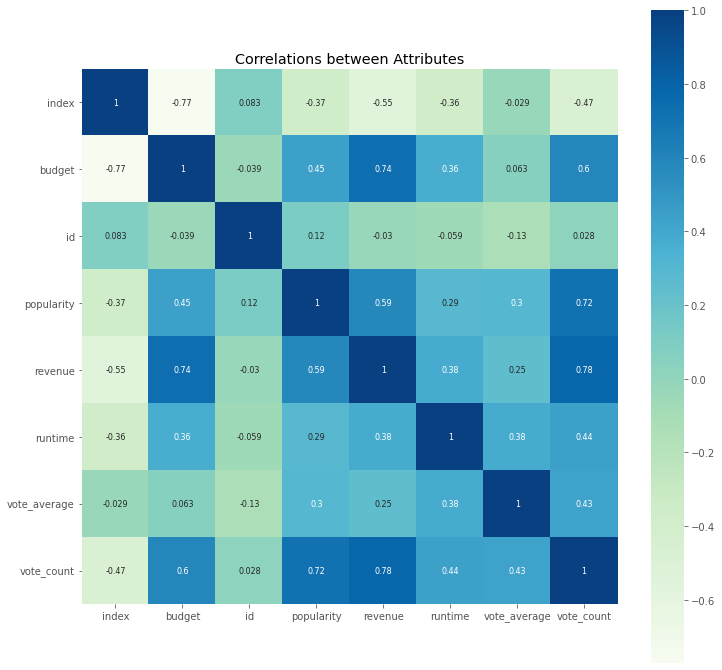

In [46]:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(df1.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

In [54]:
threshold = 10
genres_value_counts= df1.genres.value_counts()

In [55]:
# genres value count above 10
to_remove = genres_value_counts[genres_value_counts<= threshold].index
df1['genres'].replace(to_remove, np.nan, inplace=True)
genres_value_counts = genres_value_counts[::-1]
genres_value_counts

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Drama Comedy Romance                11
Animation Family                    11
Adventure Action Science Fiction    11
Action Thriller Crime               11
Romance Comedy                      12
Drama Crime                         12
Documentary                         14
Comedy Family                       14
Crime Drama Thriller                15
Horror                              19
Drama Thriller                      23
Adventure Action Thriller           23
Comedy Drama Romance                27
Horror Thriller                     27
Comedy Drama                        31
Comedy Romance                      36
Drama Romance                       45
Comedy                              71
Drama                               89
Name: genres, dtype: int64

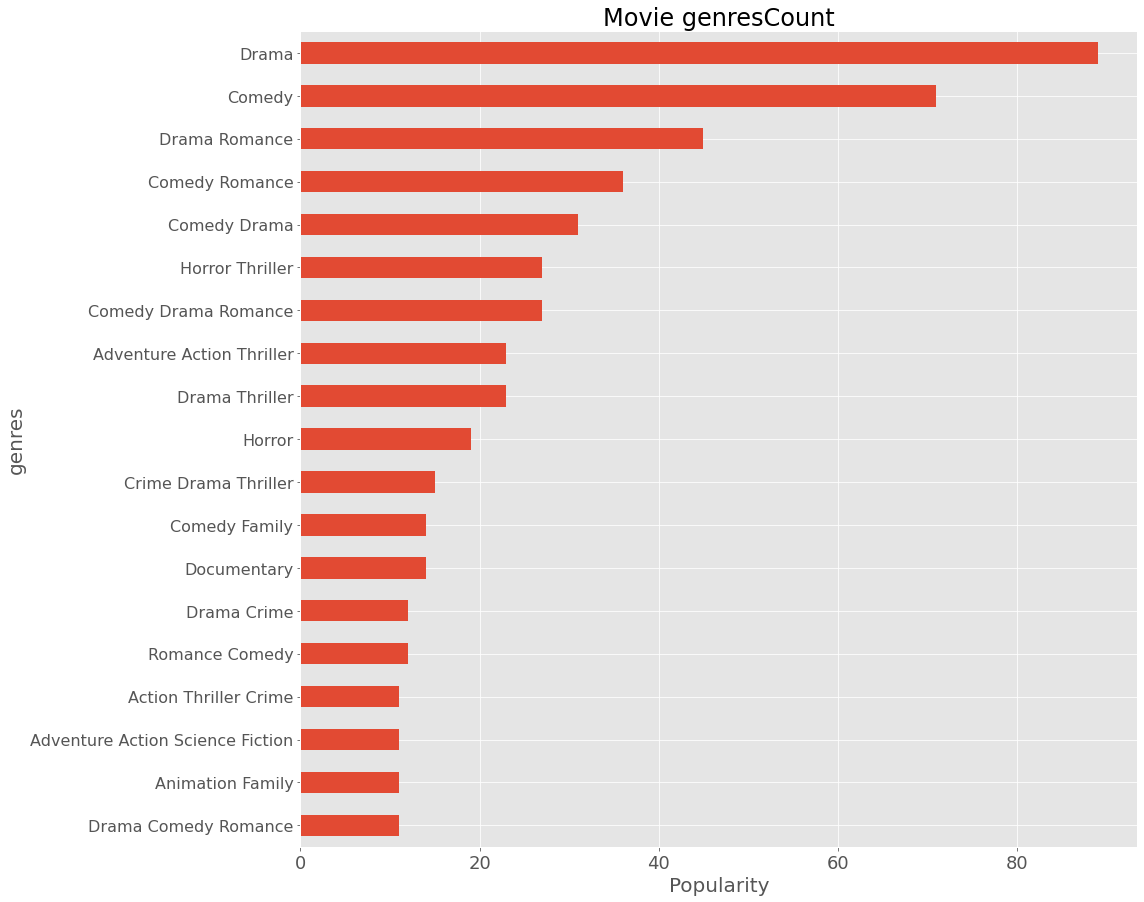

In [56]:
# genres value count above 10
genres_value_counts.plot.barh(figsize=(15, 15))
# add a suptitle
plt.title("Movie genresCount", fontsize=24)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("genres",fontsize=20)
# change xticks fontsize to 14
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
# finally show the plot
plt.show()


In [58]:
# director value count above 5
threshold = 5
director_value_counts = df1.director.value_counts()
to_remove = director_value_counts[director_value_counts<= threshold].index
df1['director'].replace(to_remove, np.nan, inplace=True)
director_value_counts = director_value_counts[::-1]
director_value_counts

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Ron Howard             6
Tim Burton             6
Kevin Smith            6
David Fincher          6
Michael Bay            7
Paul W.S. Anderson     7
Zack Snyder            7
Robert Zemeckis        7
Christopher Nolan      7
Clint Eastwood         8
Peter Jackson          8
Martin Scorsese        8
Ridley Scott           9
John Carpenter        10
Steven Soderbergh     10
Steven Spielberg      13
Name: director, dtype: int64

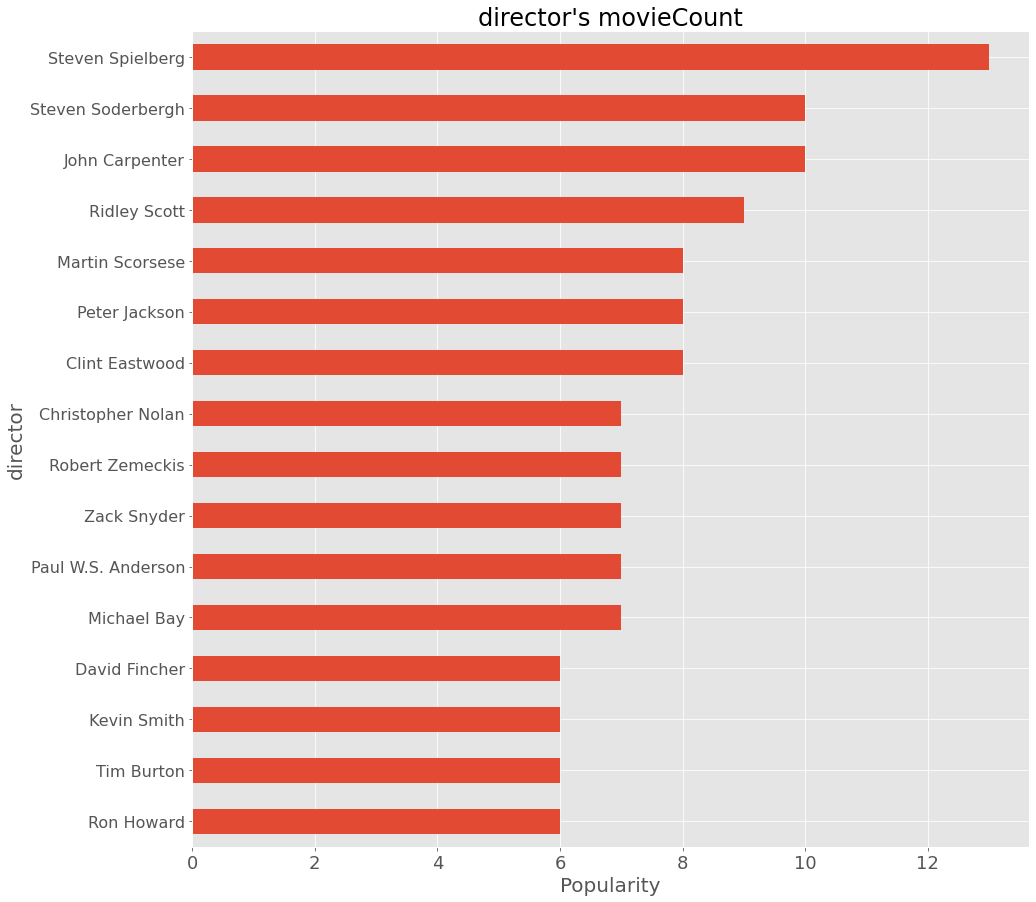

In [59]:
# director value count above 5
director_value_counts.plot.barh(figsize=(15, 15))
# add a suptitle
plt.title("director's movieCount", fontsize=24)
# set xlabel to "count"
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("director",fontsize=20)
# change xticks fontsize to 14
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
# finally show the plot
plt.show()

In [60]:
  # keywords value count 

keywords_value_counts= df1.keywords.value_counts()
keywords_value_counts = keywords_value_counts[::-1]
keywords_value_counts

children's book igloo wolf costume swallowed whole hit with a rock    1
stupidity sequel fashion male model fashion model                     1
terror spain cia helicopter secret identity                           1
jealousy dark comedy writer divorce alcoholic                         1
dancing chess prisoner coffin wrong accusal                           1
                                                                     ..
aftercreditsstinger                                                   2
based on novel revolution dystopia sequel dystopic future             2
independent film                                                      4
duringcreditsstinger                                                  7
woman director                                                        8
Name: keywords, Length: 1412, dtype: int64

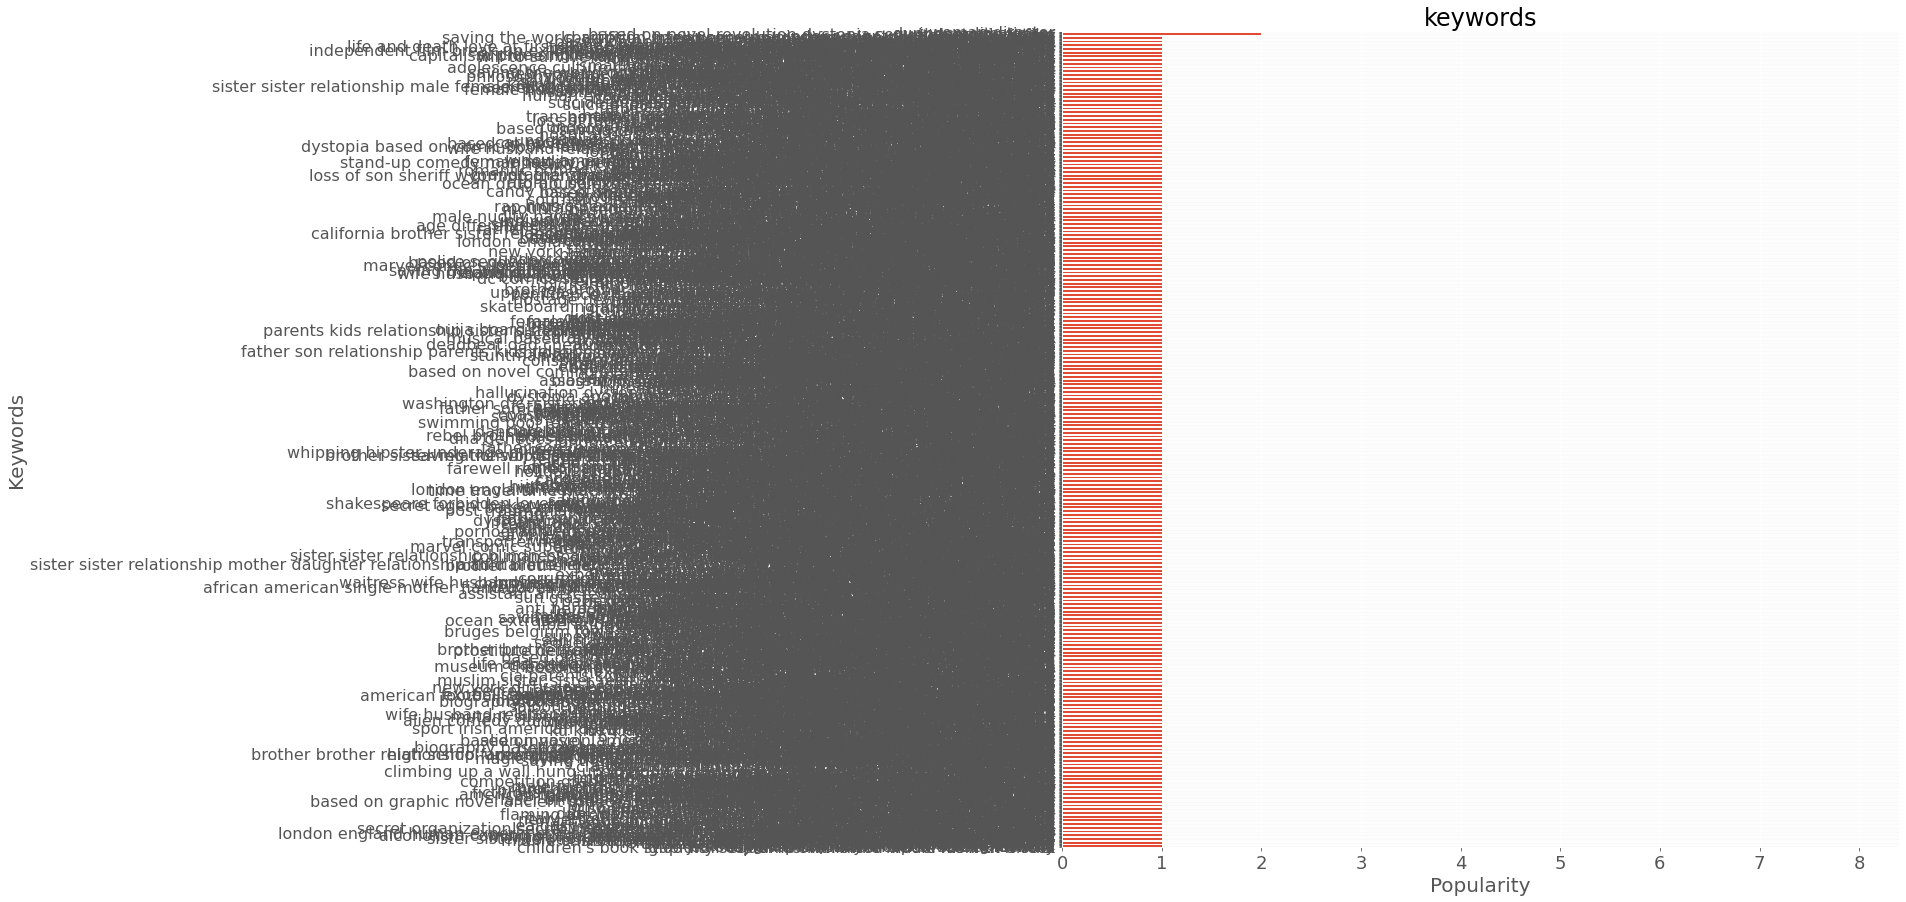

In [61]:
# director value count above 5
keywords_value_counts.plot.barh(figsize=(15, 15))
# add a suptitle
plt.title("keywords", fontsize=24)
# set xlabel to "count"
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Keywords",fontsize=20)
# change xticks fontsize to 14
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
# finally show the plot
plt.show()

In [62]:
# cast value count 
cast_value_counts= df1.cast.value_counts()
cast_value_counts = cast_value_counts[::-1]
cast_value_counts

Nate Parker Armie Hammer Aja Naomi King Jackie Earle Haley Penelope Ann Miller      1
Ben Stiller Teri Polo Robert De Niro Dustin Hoffman Barbra Streisand                1
Gugu Mbatha-Raw Nate Parker Minnie Driver Machine Gun Kelly Danny Glover            1
Tom Hardy Jennifer Morrison Nick Nolte Joel Edgerton Frank Grillo                   1
Jodie Foster Mel Gibson Jennifer Lawrence Anton Yelchin Zachary Booth               1
                                                                                   ..
Mark Hamill Harrison Ford Carrie Fisher Billy Dee Williams Anthony Daniels          2
Elijah Wood Ian McKellen Viggo Mortensen Liv Tyler Orlando Bloom                    2
Martin Freeman Ian McKellen Richard Armitage Ken Stott Graham McTavish              2
Ewan McGregor Natalie Portman Hayden Christensen Ian McDiarmid Samuel L. Jackson    2
Jennifer Lawrence Josh Hutcherson Liam Hemsworth Woody Harrelson Elizabeth Banks    3
Name: cast, Length: 1425, dtype: int64

In [63]:
cv = CountVectorizer() #creating new CountVectorizer() object
count_matrix = cv.fit_transform(df1["combined_features"]) #feeding combined strings(movie contents) to CountVectorizer() object
print(count_matrix)

  (0, 1531)	1
  (0, 1274)	1
  (0, 2437)	1
  (0, 6083)	2
  (0, 6987)	1
  (0, 1339)	1
  (0, 6037)	1
  (0, 5657)	1
  (0, 7170)	1
  (0, 7278)	1
  (0, 5642)	1
  (0, 5954)	1
  (0, 7016)	1
  (0, 6175)	1
  (0, 3728)	1
  (0, 4355)	1
  (0, 5510)	1
  (0, 37)	1
  (0, 64)	1
  (0, 2197)	1
  (0, 5753)	1
  (0, 2263)	1
  (0, 3273)	1
  (0, 988)	1
  (1, 37)	1
  :	:
  (1430, 4909)	1
  (1430, 3661)	1
  (1430, 6383)	1
  (1430, 3508)	1
  (1431, 5753)	1
  (1431, 2263)	1
  (1431, 3121)	1
  (1431, 1871)	1
  (1431, 6499)	1
  (1431, 6617)	1
  (1431, 1621)	1
  (1431, 6518)	2
  (1431, 4016)	1
  (1431, 5858)	2
  (1431, 1073)	1
  (1431, 2483)	1
  (1431, 6266)	1
  (1431, 1493)	1
  (1431, 1788)	1
  (1431, 1059)	1
  (1431, 219)	1
  (1431, 1482)	1
  (1431, 1062)	2
  (1431, 2628)	1
  (1431, 6820)	1


## Obtaining the cosine similarity matrix from the count matrix.

In [64]:
cosine_sim = cosine_similarity(count_matrix)
print(cosine_sim)

[[1.         0.10540926 0.12038585 ... 0.         0.         0.07027284]
 [0.10540926 1.         0.0761387  ... 0.         0.         0.        ]
 [0.12038585 0.0761387  1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.07027284 0.         0.         ... 0.         0.         1.        ]]


In [65]:
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

In [66]:
movie_user_likes = "Avatar"
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index])) #accessing the row corresponding to given movie to find all the similarity scores for that movie and then enumerating over it

## Sorting the list of similar_movies according to similarity scores in descending order.

In [67]:
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

## First 5 entries from sorted_similar_movies list.

In [68]:
i=0
print("Top 5 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>5:
        break

Top 5 similar movies to Avatar are:

Edge of Tomorrow
The Mechanic
Superman II
Austin Powers in Goldmember
Happy Feet Two
Pacific Rim
